# implement line sweeps of params
- all params fixed expcet one, which is swept over range
- specifically looking at test accuracy as a function of one param


In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## timestamp and dir for saving
tstamp = time.perf_counter_ns()
import os
os.mkdir('figures/scratch_folders/%i'%tstamp)

In [3]:
## default params
expargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
schargs = {
    'concentration':500,
    'stickiness_wi':750,
    'stickiness_bt':622, # 100
    'sparsity':2,
    'pvar': 0,
    'lrate':1,
    'lratep':1,
    'decay_rate':1,
}
semargs = {
  'beta2':False
}
args = {
    'sem':semargs,
    'sch':schargs,
    'exp':expargs
}
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str += "-"+"-".join(["%s_%.3f"%(i,j) for i,j in semargs.items()])
param_str

'concentration_500.000-stickiness_wi_750.000-stickiness_bt_622.000-sparsity_2.000-pvar_0.000-lrate_1.000-lratep_1.000-decay_rate_1.000-beta2_0.000'

In [4]:
# p_name = 'concentration' # 
# p_vals = np.arange(100,501,50)

# p_name = 'stickiness_wi' # 5000
# p_vals = np.arange(500,1500,100)

# p_name = 'stickiness_bt' # 100
# p_vals = np.arange(400,525,25)

p_name = 'sparsity' # 0.08
p_vals = np.arange(0,4,0.2)

# p_name = 'pvar' # 0
# p_vals = np.arange(1,2,0.1)

# p_name = 'lrate' # 1
# p_vals = np.arange(0.5,1,0.05)

# p_name = 'lratep' # 1
# p_vals = np.arange(0.8,1.05,0.01)

# p_name = 'decay_rate' # 1
# p_vals = np.arange(0.95,1.000001,0.005)

p_name,p_vals

('sparsity',
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]))

### main

In [5]:
def pltsave_macc(macc,schargs=None,labL=['B','I','E','M','L'],close=True):
  """ 
  save accuracy of individual parameter setting 
  used in paramsearch loops
  """
  plt.figure(figsize=(10,4))
  ax=plt.gca()
  for idx in range(len(macc)):
    ax.plot(macc[idx],label=labL[idx])
  ax.axhline(0.5,c='k')
  plt.legend()
  param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
  plt.savefig('figures/scratch_folders/%i/acc-%s.jpg'%(tstamp,param_str))
  if close:
    plt.close('all')
  return None


In [6]:
ns = 15
dfL = []
condL = ['blocked','interleaved','early','middle','late']
for idx,p_val in enumerate(p_vals):
  print(idx/len(p_vals))
  
  args['sch'][p_name] = p_val  
  exp_batch_data = run_batch_exp_curr(ns,args,condL)
  ## acc
  batch_acc = unpack_acc(exp_batch_data) # curr,seeds,trials
  mean_acc = batch_acc.mean(1)
  test_acc = mean_acc[:,-40:].mean(1) # curr  
  
  ## save traces of EML for each param setting
  pltsave_macc(mean_acc[2:],args['sch'],labL=['E','M','L'])
  
  ## record
  gsD = {
    **schargs,
    **dict(zip(condL,test_acc))
  }
  dfL.append(gsD)
  
gsdf = pd.DataFrame(dfL)

0.0


/Users/abeukers/wd/csw/cswsem0621/model.py:47: RuntimeWarning: invalid value encountered in double_scalars
  like = num/den


0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


In [7]:
gsdf ## test acc dataframe

,concentration,stickiness_wi,stickiness_bt,sparsity,pvar,lrate,lratep,decay_rate,blocked,interleaved,early,middle,late
0,500,750,622,0.0,0,1,1,1,0.500000,0.500000,0.500000,0.500000,0.500000
1,500,750,622,0.2,0,1,1,1,0.500000,0.500000,0.500000,0.500000,0.500000
2,500,750,622,0.4,0,1,1,1,0.500000,0.500000,0.500000,0.500000,0.500000
3,500,750,622,0.6,0,1,1,1,0.500000,0.500000,0.500000,0.500000,0.500000
4,500,750,622,0.8,0,1,1,1,0.500000,0.500000,0.500000,0.500000,0.500000
5,500,750,622,1.0,0,1,1,1,0.633792,0.500000,0.500000,0.500000,0.500000
6,500,750,622,1.2,0,1,1,1,0.651384,0.500000,0.500000,0.500000,0.500000
7,500,750,622,1.4,0,1,1,1,0.664278,0.500000,0.500000,0.500000,0.500000
8,500,750,622,1.6,0,1,1,1,0.659827,0.500000,0.500000,0.500000,0.500000
9,500,750,622,1.8,0,1,1,1,0.639003,0.500000,0.500000,0.500000,0.500000


### plt 

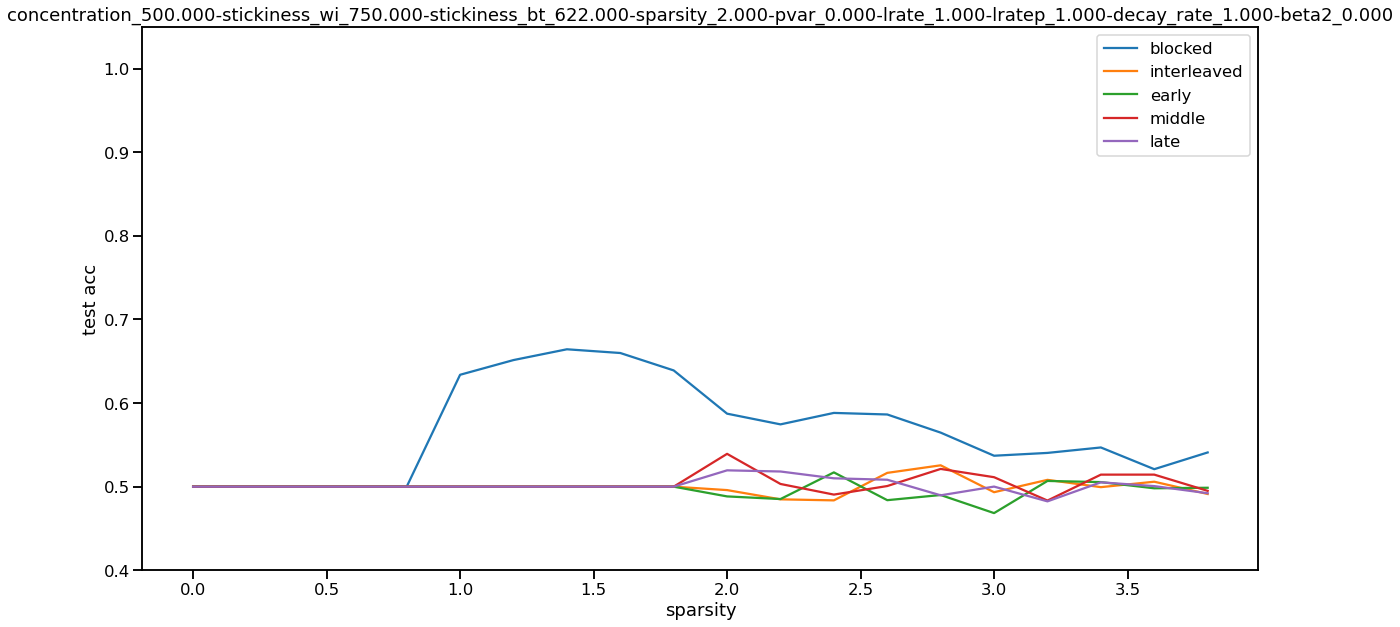

In [8]:
plt.figure(figsize=(20,10))
ax = plt.gca()
gsdf.plot(p_name,condL,ax=ax)
ax.set_ylim(0.4,1.05)
ax.set_ylabel('test acc')
plt.title(param_str)
plt.savefig('figures/scratch/testacc-sweep_%s-default_%s-t%s.png'%(
  p_name,param_str,tstamp))